#Pandas cookbook

In [37]:
import pandas as pd


url = 'https://raw.githubusercontent.com/zavarovkv/pandas-cookbook/main/train.csv'

##1. Reading data from a file

Reading data from a CSV file. By default, it assumes that the fields are comma-separated.

Simplest way.

In [40]:
data = pd.read_csv(url)
data[:3]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


Way with parameters.

In [70]:
# na_values = ['NO CLUE', 'N/A', '0']

data = pd.read_csv(url, sep=',', encoding='utf-8', index_col='PassengerId', parse_dates=[], na_values=[])
data[:3]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


Reading data from a XLSX file.

In [53]:
# data = pd.read_excel('file.xlsx', sheet_name='sheet name')

##2. Selecting multiple columns

In [55]:
data[['Name', 'Survived']][:3]

,Name,Survived
PassengerId,,
1,"Braund, Mr. Owen Harris",0
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1
3,"Heikkinen, Miss. Laina",1


##3. General info about Dataset

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [57]:
data.shape

(891, 11)

In [58]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [59]:
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [25]:
data['Survived'].unique()

array([0, 1])

## 4. Select only...

In [63]:
is_survived = data['Survived'] == 1
in_first_class = data['Pclass'] == 1

data[is_survived & in_first_class]['Name'][:5]

PassengerId
2     Cumings, Mrs. John Bradley (Florence Briggs Th...
4          Futrelle, Mrs. Jacques Heath (Lily May Peel)
12                             Bonnell, Miss. Elizabeth
24                         Sloper, Mr. William Thompson
32       Spencer, Mrs. William Augustus (Marie Eugenie)
Name: Name, dtype: object

##5. Check Dataframe for NaN value

In [65]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

##6. SQL operations

In [27]:
data[data['Survived'] == 0].groupby('Sex')['Age'].mean()

Sex
female    25.046875
male      31.618056
Name: Age, dtype: float64

In [66]:
data = data.sort_values(by='Name', ascending=True)
data[:3]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
846,0,3,"Abbing, Mr. Anthony",male,42.0,0,0,C.A. 5547,7.55,NaN,S
747,0,3,"Abbott, Mr. Rossmore Edward",male,16.0,1,1,C.A. 2673,20.25,NaN,S
280,1,3,"Abbott, Mrs. Stanton (Rosa Hunt)",female,35.0,1,1,C.A. 2673,20.25,NaN,S


##7. Hist

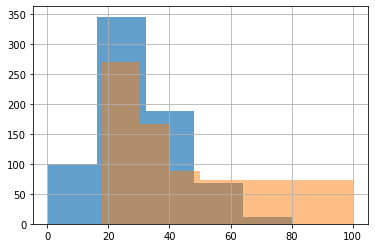

In [82]:
data['Age'].hist(bins=5, alpha=0.7)
data['Age'].hist(bins=[18, 30, 40, 50, 100], alpha=0.5)

In [28]:
# data['Survived'] = pd.to_numeric(data['Survived'], errors='coerce')
# data['Survived'] = data['Survived'].astype('int')
# data['timestamp'] = pd.to_datetime(data['timestamp'], format='%Y-%m-%dT%H:%M:%S')
#data_pivot = data.pivot_table(index=['Survived', 'Sex'], columns='Fare', values='Age', aggfunc='sum')